# Modelproject

In [1]:
# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

import numpy as np
from scipy import optimize
import sympy as sm
from scipy.optimize import minimize 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

import numpy as np
from scipy.optimize import minimize

from modelpro import malthus_economics 

**Table of contents**<a id='toc0_'></a>    
- 1. [Model description](#toc1_)
- 2. [Analytical solution using Sumpy](#toc2_)    
- 3. [Solving the model for Steady-state](#toc3_)
- 4. [Numerical analysis](#toc4_)       
- 5. [Conclusion](#toc5_)  

## 1. <a id='toc1_'></a>[Model description](#toc0_)

We consider a Malthus economy where we apply fertility as the main factor of this model.

The utility function of household depends on consumption $c_t$ and number of surviving children $n_t$ where $\beta \epsilon (0.1)$.  

$$u_t(c_t) = \beta\ln(c_t) + (1-\beta)\ln(n_t)$$

The budget constraint is given as:

$$c_t + \lambda n_t = y_t (1-\tau)$$

Where c is consumption, $\lambda$ is relative price on 1 child, $y_t$ is the average income and $\tau$ is income after tax. 

Income per capita is given by: 
$y_t \equiv (\frac{AX}{L_t})^{\alpha}$

We solve the problem by inserting the budget contraint in the utility function: 

$$\max_{u_t}=\beta log[y_t (1-\tau)-\lambda n_t]+(1-\beta) log (n_t)$$

We take FOC wrt. $n_t$
$$\frac{\partial u}{\partial n}=0: \beta \frac{-\lambda}{y_t (1-\tau)-\lambda n_t}+(1-\beta) \frac{1}{n_t}=0$$

Isolating $n_t$ yields:
$$n_t=\frac{1-\beta}{\lambda}y_t(1-\tau)$$

Where:
$$n_t=\frac{1-\beta}{\lambda}y_t(1-\tau) \equiv \eta y_t$$

And $$\eta \equiv\frac{1-\beta}{\lambda}(1-\tau)$$

Population in the next period is the number of surviving children, and the the part of the population that survives to the next period: <br>
$$L_{t+1}=n_tL_t+(1-\mu)L_t$$
Where $\mu$ is adult mortality. 

## 2. <a id='toc2_'></a>[Analytical solution using Sumpy](#toc0_)

To study the fertility model, we need some variables that define income, consumption, population and more.

In [2]:
#Defining variables and parameters
Y = sm.symbols('Y_t')
alpha = sm.symbols('alpha')
L = sm.symbols('L_t')
A = sm.symbols('A')
X = sm.symbols('X')
n = sm.symbols('n_t')
lambda_ = sm.symbols('lambda')
tau = sm.symbols('tau')
beta= sm.symbols('beta')
mu = sm.symbols('mu')
c = sm.symbols('c_t')
y = sm.symbols('y_t')
u= sm.symbols('u_t')
L1 = sm.symbols('L_t+1')
e = sm.symbols('eta')
L_ss = sm.symbols('L^*')

Writing up the utility

In [3]:
# Defining utility function
utility = beta*sm.ln(c)+(1-beta)*sm.ln(n)
utility

beta*log(c_t) + (1 - beta)*log(n_t)

The problem is to choose values for c and n such that the utility maximizes, given the following:

In [4]:
budgetconstraint = sm.Eq(c+lambda_*n,y*(1-tau))
budgetconstraint

Eq(c_t + lambda*n_t, y_t*(1 - tau))

Now solving with respect to c, which is the number of surviving children

In [5]:
c_solve = sm.solve(budgetconstraint, c)
c_substituted = c_solve[0]
c_substituted

-lambda*n_t - tau*y_t + y_t

Inserting this in the utility function to make it a function of n, we can maximize given the equation below

In [6]:
utility_substituted = utility.subs(c, c_substituted)
utility_substituted

beta*log(-lambda*n_t - tau*y_t + y_t) + (1 - beta)*log(n_t)

Taking the first order condition with respect to n to find the optimal level of births

In [7]:
first_order = sm.diff(utility_substituted, n)

first_order

-beta*lambda/(-lambda*n_t - tau*y_t + y_t) + (1 - beta)/n_t

The optimal number of births are then:

In [8]:
pop = sm.Eq(e, ((1-beta)/(lambda_))*(1-tau))
pop

Eq(eta, (1 - beta)*(1 - tau)/lambda)

In [9]:
n_solve = sm.solve(first_order, n)
n_solve[0]

y_t*(beta*tau - beta - tau + 1)/lambda

In [10]:
n_solvedd = sm.Eq(n, n_solve[0])
n_solvedd

Eq(n_t, y_t*(beta*tau - beta - tau + 1)/lambda)

In [11]:
sovledddd = n_solvedd.subs(e, (((1-beta)/(lambda_))*(1-tau)))
sovledddd

Eq(n_t, y_t*(beta*tau - beta - tau + 1)/lambda)

Going further, we look at the transition equation

In [12]:
transition = sm.Eq(n*L+(1-mu)*L, L1)
transition

Eq(L_t*n_t + L_t*(1 - mu), L_t+1)

Inserting per capita production equation into the fertility equation assuming:

In [13]:
income1 = sm.Eq(y, ((A*X)/L)**alpha)
income1

Eq(y_t, (A*X/L_t)**alpha)

In [14]:
transition_1 = transition.subs(n, n_solve[0])
transition_1

Eq(L_t*(1 - mu) + L_t*y_t*(beta*tau - beta - tau + 1)/lambda, L_t+1)

So, we get:

Using this term in the transition equation to get:

In [15]:
transition_2 = transition_1.subs(y, income1.rhs)
transition_2

Eq(L_t*(1 - mu) + L_t*(A*X/L_t)**alpha*(beta*tau - beta - tau + 1)/lambda, L_t+1)

Now we assume steady state levels $$L_{t+1}=L_t=L^*$$

In [16]:
L_steadystate = sm.Eq(L, L_ss)
L_steadystate

Eq(L_t, L^*)

In [17]:
transition_3 = transition_2.subs(L, L_steadystate.rhs)
transition_4 = transition_3.subs(L1, L_steadystate.rhs)
transition_4

Eq(L^**(1 - mu) + L^**(A*X/L^*)**alpha*(beta*tau - beta - tau + 1)/lambda, L^*)

In this paper the steady state is taken for the population density, X. To get the steady state given the population density, we have to make the following derivations:
$$(L^*)^{1-\alpha}(AX)^\alpha\eta=L^*\mu$$
$$\Leftrightarrow L^*=(AX)\left({\frac{\eta}{\mu}}\right)^{\frac{1}{\alpha}}$$
Now, it is possible to divide by the area of land, so we can get the population density:
$$\Leftrightarrow \frac{L^*}{X}=A\left({\frac{\eta}{\mu}}\right)^{\frac{1}{\alpha}}$$
From this point on, whenever we refer to the steady state of population, we look at the expression above.
However, we must not forget to substitute $\eta\equiv \frac{(1-\beta)(1-\tau)}{\lambda}$

Solving the steady state level for population:

In [18]:
L_steadystate1 = sm.Eq((A*(((1-beta)*(1-tau))/(lambda_*mu))**(1/alpha)), L_ss)
L_steadystate1

Eq(A*((1 - beta)*(1 - tau)/(lambda*mu))**(1/alpha), L^*)

We have the steady state for population and can therefore insert it in the income equation to get the steady state income level $$y^*=\left(\frac{AX}{L^*}\right)^\alpha$$


In [19]:
income2 = income1.subs(L, L_steadystate1.lhs)
income2

Eq(y_t, (X/((1 - beta)*(1 - tau)/(lambda*mu))**(1/alpha))**alpha)

When Python reads the parameter values, it will return False if the exponential is negative. Therefore, we use the sm.Abs function to take the absolute values of the expression.

In [20]:
income3 = sm.Abs((((A*X)/L_steadystate1.lhs)**alpha))
income3

Abs((X/((1 - beta)*(1 - tau)/(lambda*mu))**(1/alpha))**alpha)

For the parameters to be used in a computational way, they need to be converted using the lambdify option from sympy.

In [21]:
steadystate_income = sm.lambdify((X, alpha, beta,lambda_,mu,tau), income3)

## 3. <a id='toc3_'></a>[Solving the model for Steady-state](#toc0_)

The solving of the model follows the following order

1. Setting parameter values.
2. Solve for steady-state for income level. 
3. Interpreting parameters
4. Solving of models:
- Model 1: Technology at constant level
- Model 2: Permanent technology shock
- Model 3: Technology grow at constant rate

We find for all three models the steady-state level for population size, optimal number of children and optimal income


1.Setting parameter values. The parameter values are used to compute the steady-state level of income

- $X = 1$
- $\alpha = 0.5$
- $\beta = 0.5$
- $\lambda = 1$
- $\mu = 0.01$
- $\tau = 0.4$

2. Solving for steady state for income.

In [22]:
steadystate_income(1, 0.5, 0.5, 1, 0.01, 0.4)

0.03333333333333333

3.Interpreting parameters for the model

The steady state level for income per capita is unaffected by changes to land (X) and technology (A).
An increase mortality leads to a decrease in survival rates. Associated costs with raising children and births increase. This in turn leads to a decrease in population size, which ultimately increase income pr. capita.

We seek to solve the model in the Malthus class

Parameters are set as follows:

Mortality rate is set to $\mu$=0.01.This translates to 1 percent of the population dying every period (year).
Land X and $\lambda$ are set to 1. The preference parameter $\beta$ and $\alpha$ are set to 0.5.The same parameter values are used in the MalthusModel.

Below is the solved model in the MalthusModel class.
We plot the utility function of household. 

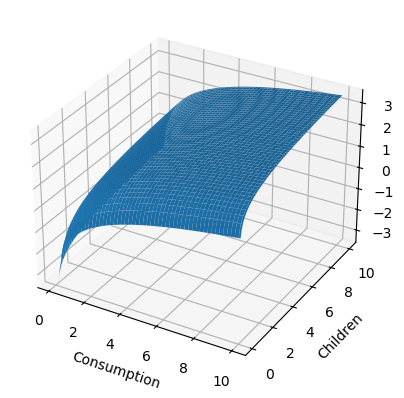

In [23]:
# We define the range of values for consumption and leisure
c_range = np.linspace(0.1, 10, 100)
n_range = np.linspace(0.1, 10, 100)

# Here we create a meshgrid of the range of values
c, n = np.meshgrid(c_range, n_range)

# Defining the utility function
beta = 0.5
u = np.log(c) + beta * np.log(n)

# We create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(c, n, u)
ax.set_xlabel('Consumption')
ax.set_ylabel('Children')
ax.set_zlabel('Utility')
plt.show()

## 4. <a id='toc4_'></a>[Numerical analysis](#toc0_)

This section will showcase the use of numerical analysis to compute the steady state level, and determine the levels of the respective variables that make up the model.

## Model 1: Technology at constant level

Solving and visualizing Steady-state at population (L)=1000

c:\Users\Ejer\anaconda3\Lib\site-packages\scipy\optimize\_optimize.py:404: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


Steady state population size: 89345.92853097971
Optimal number of children: 0.01003564409885433
Steady state income: 0.03345512190317959


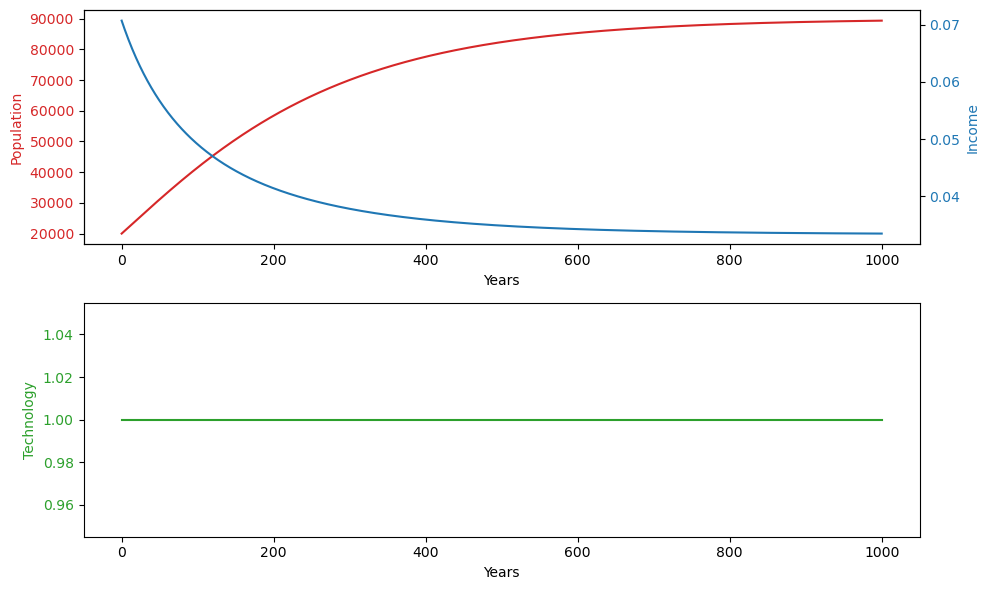

In [24]:
# Solving the model using the MalthusModel class
model = malthus_economics()
model.steady_state()

The plot illustrates the convergence of population and income towards two steady state values: 89345.92 for population and 0.03345 for income, maintaining a constant level of technology.

Furthermore, fertility rate is computed at 0.1 which matches the mortality rate, and thus the equilibrium reflects the Malthusian trap. At this point, income per capita stagnates due to the balance between birth and death rates in the steady state.

## Model 2: Permanent technology shock

Computing and visualizing Steady-state after a permanent shock to technology (t)=100

Steady state population size: 178795.57945076266
Optimal number of children: 0.010032719973343571
Steady state income: 0.0334454165497911


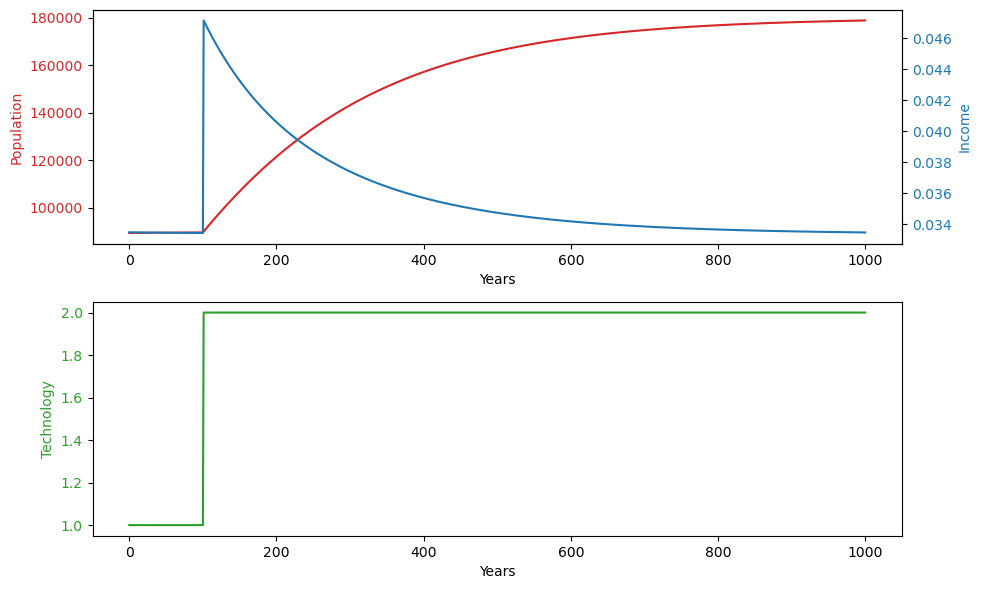

In [25]:
#Defining the initial population in the steady state
model.L = model.L
#Use the model where a technology shock is introduced in period t=100
try:
    steady_state_population, optimal_num_children, steady_state_income = model.steady_state1()

except:
    pass

In the second plot, a permanent shock occurs in the technology level, transitioning from 1 to 2 at t=100. This shock induces a short-term increase in income, reflecting the immediate benefits of enhanced technology. However, the subsequent population growth stemming from the technology shock leads to a decline in income per capita. Over time, income per capita converges back to its initial level before the technology shock.

Specifically, the population would increase from 89.345 to 178.795 as parents, empowered by increased income, can afford to have more children.

## Model 3: Technology grow at constant rate

In the last model 3 we let technology grow at a constant rate

Steady state population size: 97177.26181336524
Optimal number of children: 0.010115966543489825
Steady state income: 0.033723396565744766


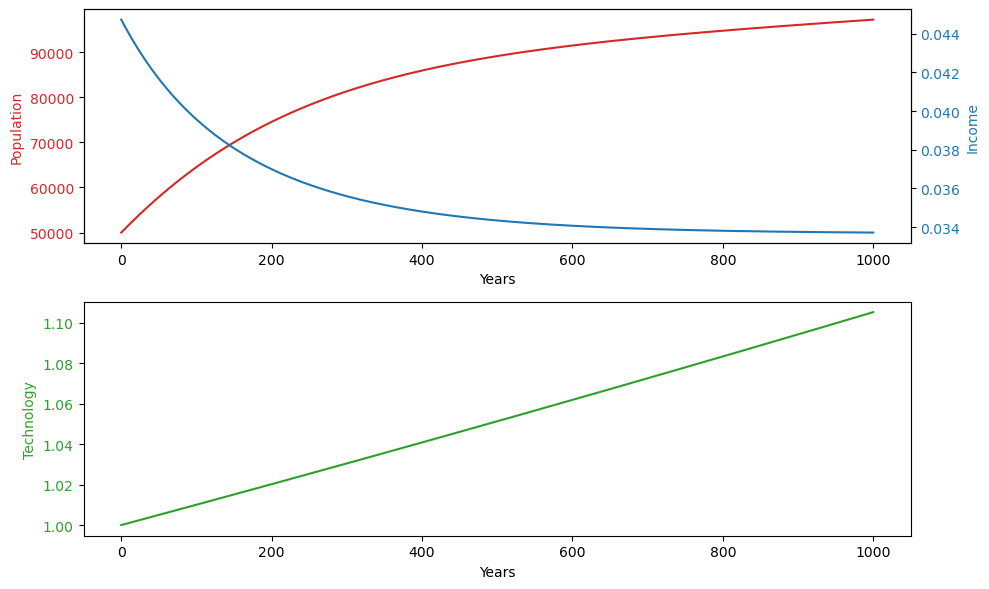

In [26]:
#Changing population to 50.0000 and making technological level equal 1 with an increase of 0.0001 each year
model.L = 50000
model.A = 1
model.g=0.0001

try:
    steady_state_population, optimal_num_children, steady_state_income = model.steady_state()

except:
    pass

In the model extension, we introduced a constant technology growth rate, denoted as g = 0.0001. This ongoing technological innovation cause a long-term increase in population growth. After 1000 years, at the maximum number of iterations, the population reaches 97177.2.
With constant technological growth, population expansion persists indefinitely. In the long run, income converges to the value of 0.03, indicating a stable equilibrium where income per capita reaches a consistent level despite ongoing technological advancements and population growth.

## INTERACTIVE!!

## 5. <a id='toc5_'></a>[Conclusion](#toc0_)

In this project, we have conducted simulations of the Malthus Model. In the Malthusian framework, higher income incentivizes households to have more children, as they derive utility from larger family sizes. When the population falls below its steady state, population growth occurs because the number of surviving children surpasses the mortality rate. As the population expands, income per capita declines due to the diminishing marginal product of labor.

Our model extensions involve two key modifications:

1) Introducing a permanent technological advancement occurring at period t=100.
2) Implementing constant technological growth at a rate denoted by g.

With the introduction of a permanent but constant technological advancement, income experiences a short-term increase but eventually reverts to the original steady state in the long run. Concurrently, the population converges to a new and higher steady state.

Thus, a higher level of technology leads to a greater population size while maintaining the same income per capita.

In the case of constant technological growth, the population does not reach a steady state but instead grows at a constant rate equivalent to g in the long term. However, income per capita stabilizes at a constant level because technology and population grow at identical rates.